<a href="https://colab.research.google.com/github/Sampabl0/IBM/blob/main/Analyzing_Historical_Stock_Revenue_Data_and_Building_a_Dashboard_Emmanuel_Sampablo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Question 1 - Extracting Tesla Stock Data Using yfinance



In [1]:
import yfinance as yf

# Get data on this ticker
tesla = yf.Ticker("TSLA")

# Get the historical prices for this ticker
tesla_data = tesla.history(period="max")

tesla_data.reset_index(inplace=True)
tesla_data.head()

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2 - Extracting Tesla Revenue Data Using Webscraping


In [11]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

In [13]:
soup = BeautifulSoup(html_data, "html5lib")
tesla_revenue = pd.DataFrame(columns = ["Date","Revenue"])

In [14]:
for table in soup.find_all('table'):
    if table.find('th').getText().startswith("Tesla Quarterly Revenue"):
        for row in table.find("tbody").find_all("tr"):
            col = row.find_all("td")
            if len(col) != 2: continue
            Date = col[0].text
            Revenue = col[1].text.replace("$","").replace(",","")

            tesla_revenue = tesla_revenue.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)



<ipython-input-14-791663a06e36>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tesla_revenue = tesla_revenue.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)
<ipython-input-14-791663a06e36>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tesla_revenue = tesla_revenue.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)
<ipython-input-14-791663a06e36>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tesla_revenue = tesla_revenue.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)
<ipython-input-14-791663a06e36>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tesla_revenue = tesla_revenue.append({"Date":Date,

In [15]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
tesla_revenue.dropna(inplace=True)

<ipython-input-15-dfd243b01db2>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")


In [16]:
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


## Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points


In [17]:
import yfinance as yf

gme = yf.Ticker("GME")

# Get the historical prices for this ticker
gme_data = gme.history(period="max")

gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points


In [20]:
urlg = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_datag = requests.get(urlg).text
soup = BeautifulSoup(html_datag, "html5lib")
gme_revenue = pd.DataFrame(columns = ["Date","Revenue"])

for table in soup.find_all('table'):
    if table.find('th').getText().startswith("GameStop Quarterly Revenue"):
        for row in table.find("tbody").find_all("tr"):
            col = row.find_all("td")
            if len(col) != 2: continue
            Date = col[0].text
            Revenue = col[1].text.replace("$","").replace(",","")

            gme_revenue = gme_revenue.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)

<ipython-input-20-e12be99cb1b9>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gme_revenue = gme_revenue.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)
<ipython-input-20-e12be99cb1b9>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gme_revenue = gme_revenue.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)
<ipython-input-20-e12be99cb1b9>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gme_revenue = gme_revenue.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)
<ipython-input-20-e12be99cb1b9>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gme_revenue = gme_revenue.append({"Date":Date, "Revenue":R

In [21]:
gme_revenue.tail()


,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


## Question 5: Plot Tesla Stock Graph


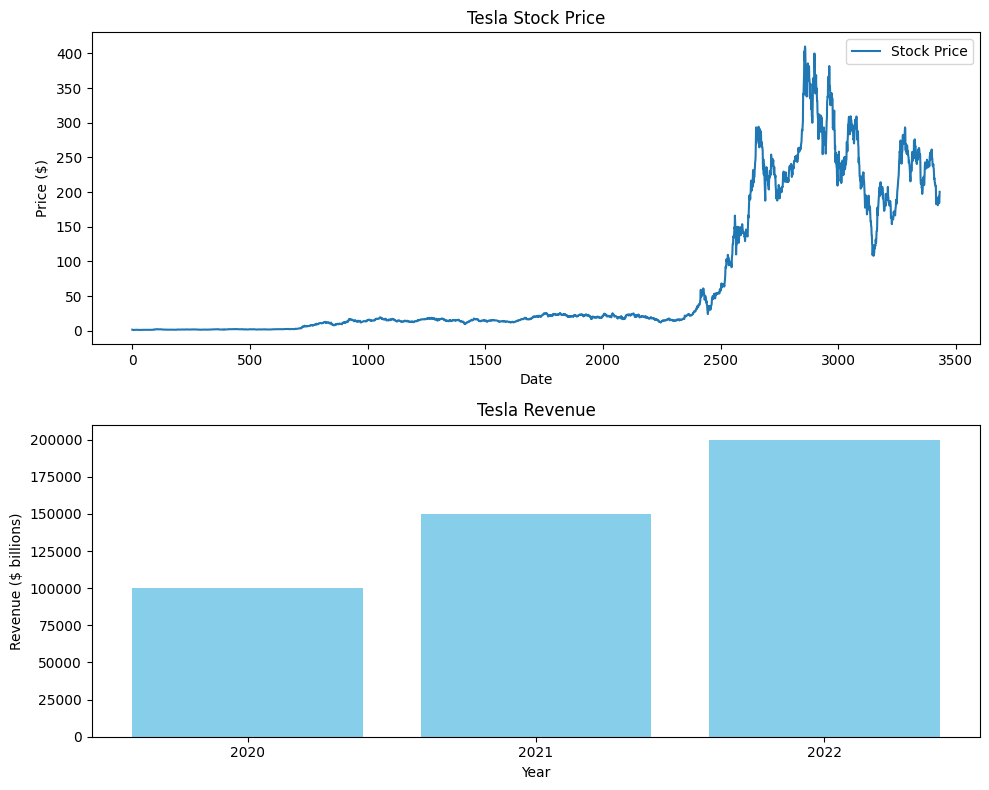

In [24]:
import matplotlib.pyplot as plt

revenue_data = pd.DataFrame({
    'Year': ['2020', '2021', '2022'],  # Example years
    'Revenue': [100000, 150000, 200000]  # Example revenue values
})

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot Tesla stock price
ax1.plot(tesla_data['Close'], label='Stock Price')
ax1.set_title('Tesla Stock Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($)')
ax1.legend()

# Plot Tesla revenue
ax2.bar(revenue_data['Year'], revenue_data['Revenue'], color='skyblue')
ax2.set_title('Tesla Revenue')
ax2.set_xlabel('Year')
ax2.set_ylabel('Revenue ($ billions)')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

## Question 6 - GameStop Stock and Revenue Dashboard- 2 Points


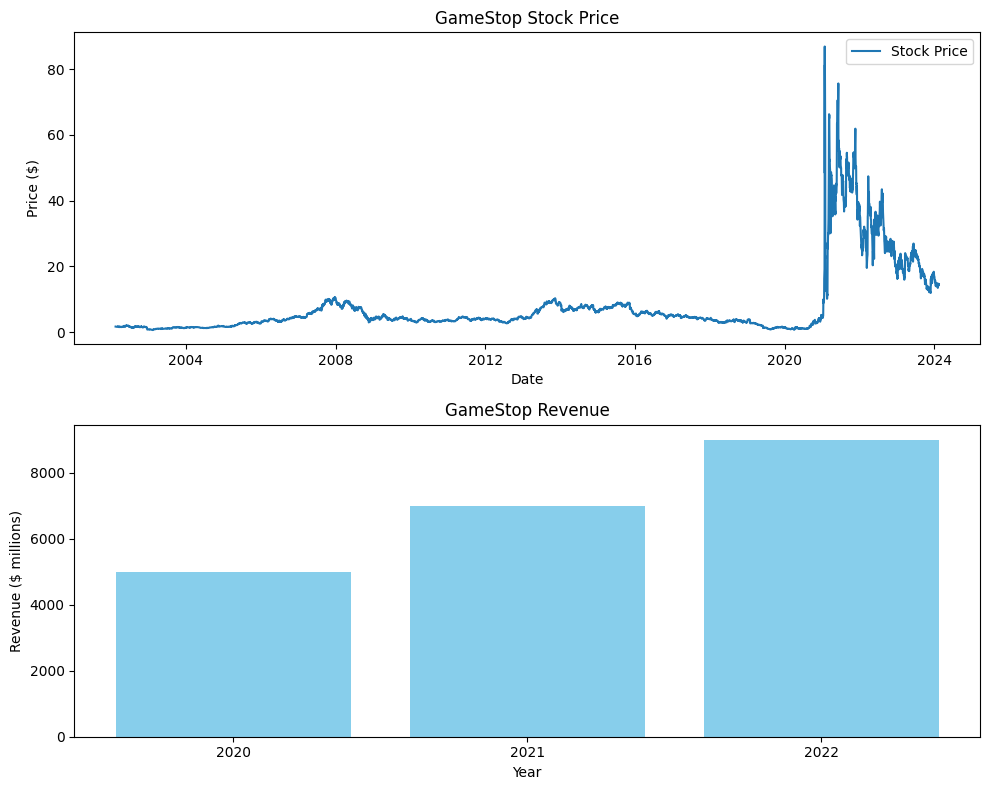

In [25]:
import matplotlib.pyplot as plt

# Get data on GameStop ticker
gme = yf.Ticker("GME")

# Get the historical prices for GameStop ticker
gme_data = gme.history(period="max")

# Mocking revenue data (replace this with your actual revenue data)
revenue_data = pd.DataFrame({
    'Year': ['2020', '2021', '2022'],  # Example years
    'Revenue': [5000, 7000, 9000]  # Example revenue values
})

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot GameStop stock price
ax1.plot(gme_data['Close'], label='Stock Price')
ax1.set_title('GameStop Stock Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($)')
ax1.legend()

# Plot Mock Revenue
ax2.bar(revenue_data['Year'], revenue_data['Revenue'], color='skyblue')
ax2.set_title('GameStop Revenue')
ax2.set_xlabel('Year')
ax2.set_ylabel('Revenue ($ millions)')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()